In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

data = pd.read_csv('/content/drive/MyDrive/data/CarPrice_Assignment.csv')

In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data = data.drop(columns=['car_ID'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d51d2b400>,
      dtype=object)

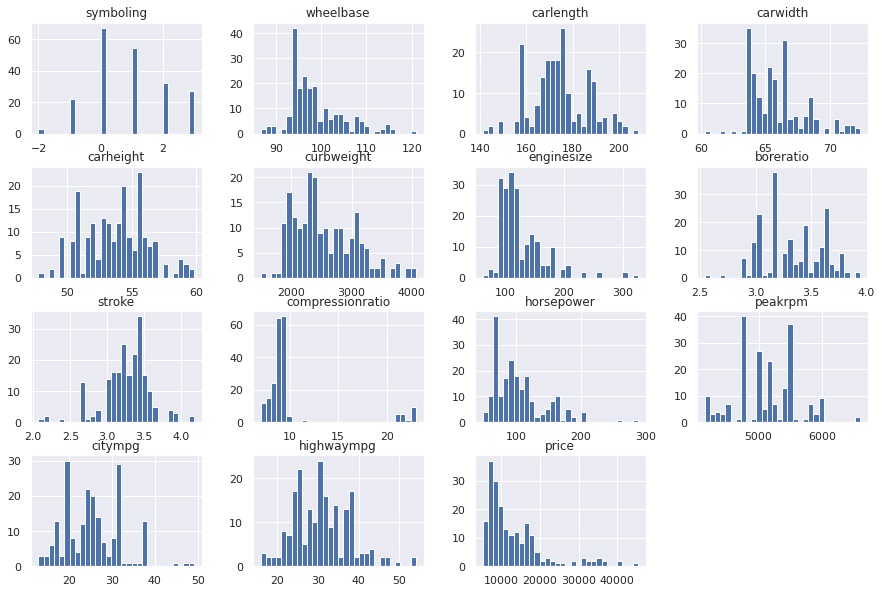

In [ ]:
data.hist(bins=30, figsize=(15, 10))

In [ ]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# for : curbweight,horsepower,peakrpm,price , standard dev is very high

In [ ]:
data['curbweight_logtransform'] = np.log10(data['curbweight'])
data['horsepower_logtransform'] = np.log10(data['horsepower'])
data['peakrpm_logtransform'] = np.log10(data['peakrpm'])

data = data.drop(columns=['curbweight','horsepower','peakrpm'])


In [ ]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,citympg,highwaympg,price,curbweight_logtransform,horsepower_logtransform,peakrpm_logtransform
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,126.907317,3.329756,3.255415,10.142537,25.219512,30.751220,13276.710571,3.398887,1.990500,3.707817
std,1.245307,6.021776,12.337289,2.145204,2.443522,41.642693,0.270844,0.313597,3.972040,6.542142,6.886443,7988.852332,0.085972,0.149786,0.040714
min,-2.000000,86.600000,141.100000,60.300000,47.800000,61.000000,2.540000,2.070000,7.000000,13.000000,16.000000,5118.000000,3.172603,1.681241,3.618048
25%,0.000000,94.500000,166.300000,64.100000,52.000000,97.000000,3.150000,3.110000,8.600000,19.000000,25.000000,7788.000000,3.331427,1.845098,3.681241
50%,1.000000,97.000000,173.200000,65.500000,54.100000,120.000000,3.310000,3.290000,9.000000,24.000000,30.000000,10295.000000,3.382737,1.977724,3.716003
75%,2.000000,102.400000,183.100000,66.900000,55.500000,141.000000,3.580000,3.410000,9.400000,30.000000,34.000000,16503.000000,3.467608,2.064458,3.740363
max,3.000000,120.900000,208.100000,72.300000,59.800000,326.000000,3.940000,4.170000,23.000000,49.000000,54.000000,45400.000000,3.609167,2.459392,3.819544


In [ ]:
data.corr()

,symboling,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,citympg,highwaympg,price,curbweight_logtransform,horsepower_logtransform,peakrpm_logtransform
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.105790,-0.130051,-0.008735,-0.178515,-0.035823,0.034606,-0.079978,-0.216348,0.052616,0.279700
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.569329,0.488750,0.160959,0.249786,-0.470414,-0.544082,0.577816,0.763385,0.412677,-0.368427
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.683360,0.606454,0.129533,0.158414,-0.670909,-0.704662,0.682920,0.889075,0.615988,-0.288465
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.735433,0.559150,0.182942,0.181129,-0.642704,-0.677218,0.759325,0.858690,0.666306,-0.223528
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.067149,0.171071,-0.055307,0.261214,-0.048640,-0.107358,0.119336,0.301473,-0.071621,-0.324267
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,1.000000,0.583774,0.203129,0.028971,-0.653658,-0.677470,0.874145,0.824171,0.787354,-0.245112
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.583774,1.000000,-0.055909,0.005197,-0.584532,-0.587012,0.553173,0.670269,0.609800,-0.258658
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.203129,-0.055909,1.000000,0.186110,-0.042145,-0.043931,0.079443,0.159479,0.110743,-0.075529
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.028971,0.005197,0.186110,1.000000,0.324701,0.265201,0.067984,0.141793,-0.239468,-0.456784
citympg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.653658,-0.584532,-0.042145,0.324701,1.000000,0.971337,-0.685751,-0.787507,-0.871553,-0.113706


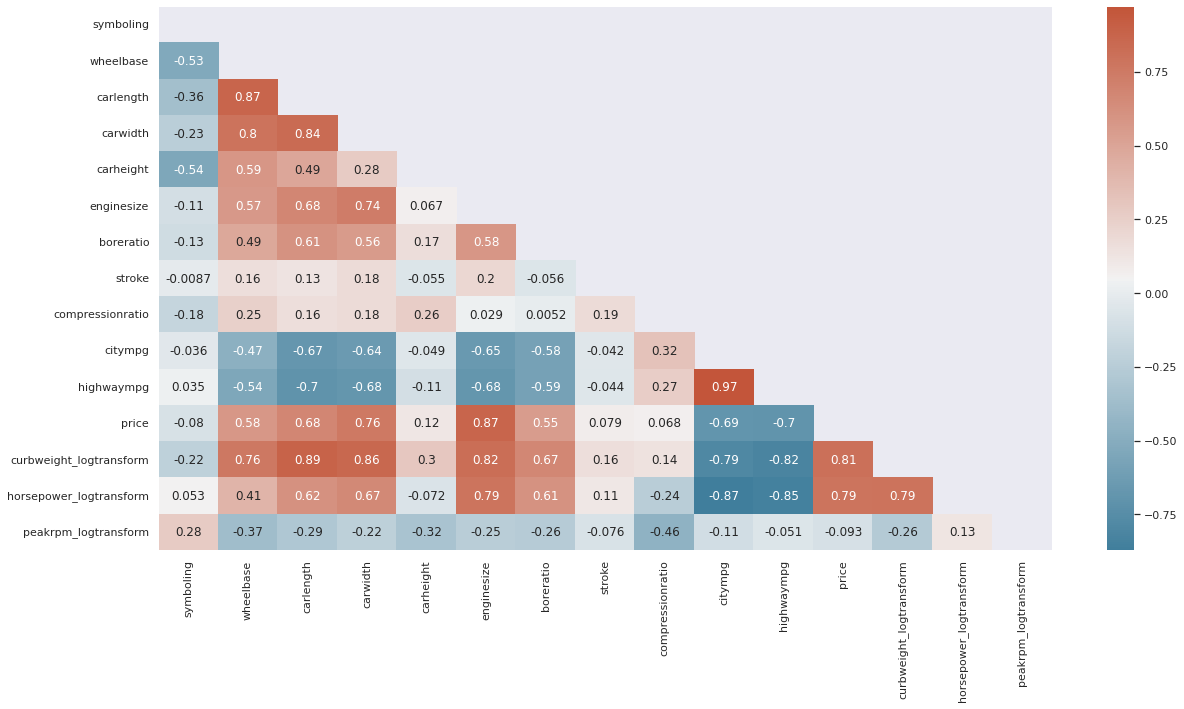

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

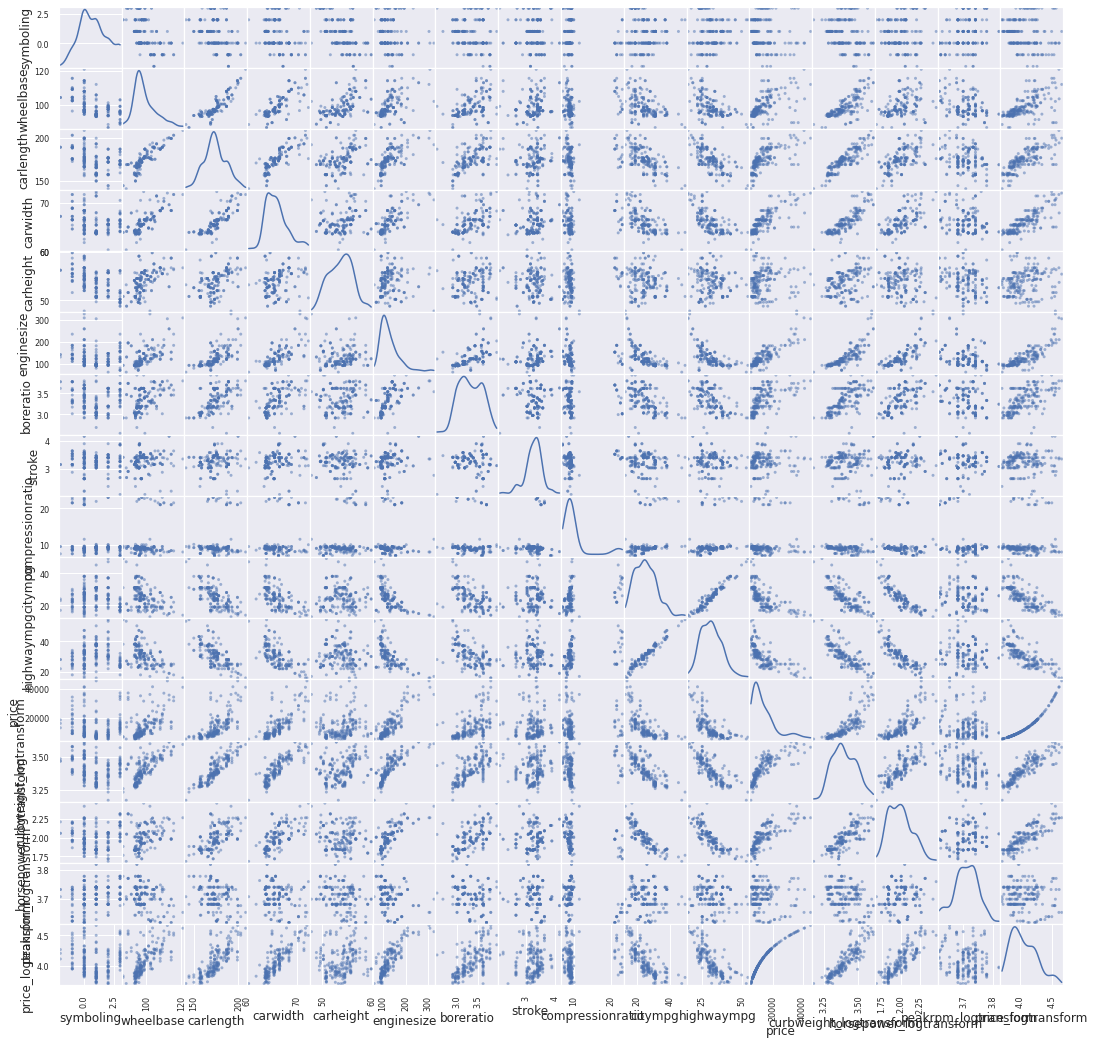

In [ ]:
scatter_matrix(data, figsize=(18,18), diagonal='kde')
plt.show()

In [ ]:
# Standarization of Numercal Columns 


numerical_columns = data.columns[data.dtypes!=object].tolist()#.remove('price')
numerical_columns.remove('price')


In [ ]:
scaler = StandardScaler()
scaler.fit(data[numerical_columns])
data_standard = pd.DataFrame(scaler.transform(data[numerical_columns]), columns=numerical_columns)


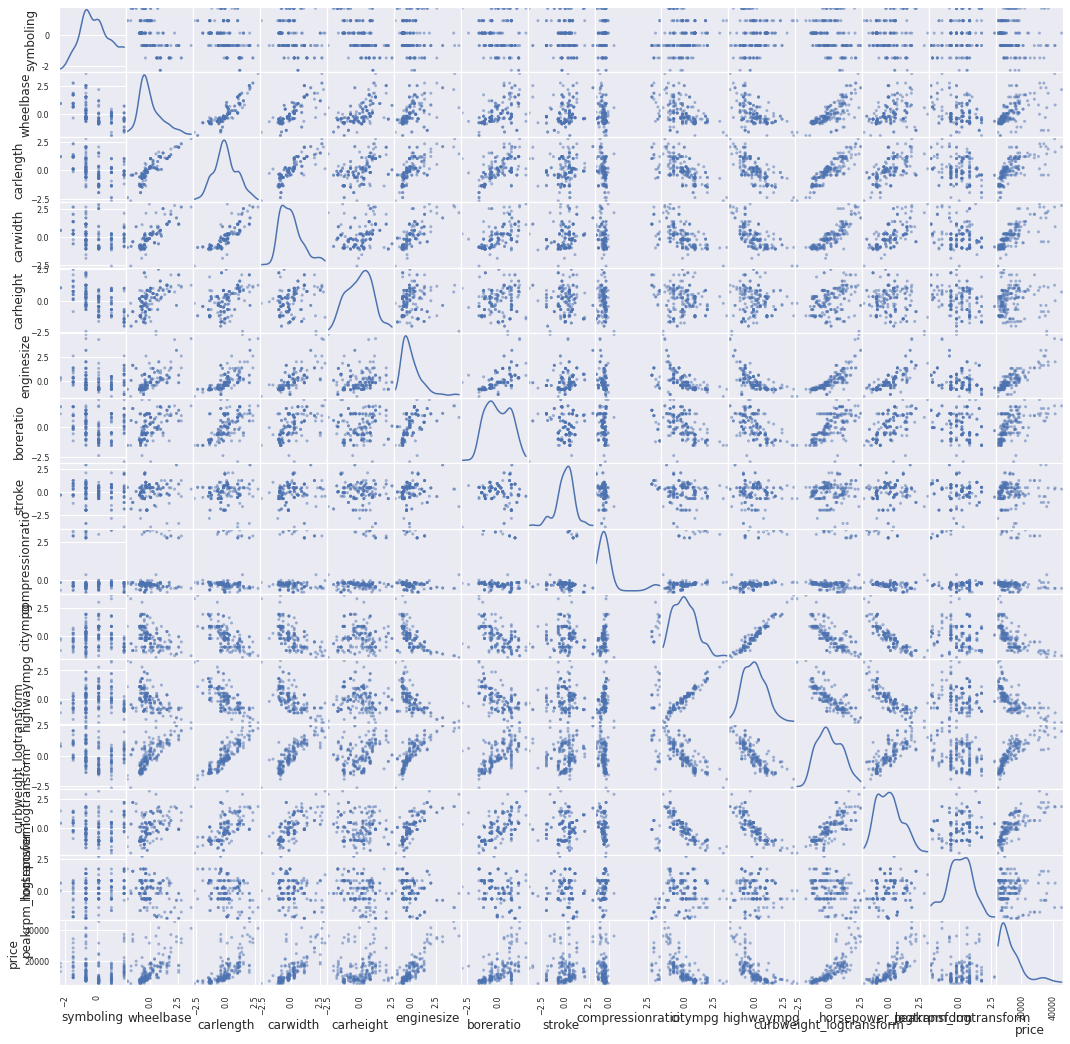

In [ ]:
data_new = pd.concat([ data_standard,data['price']], axis=1)

scatter_matrix(data_new, figsize=(18,18), diagonal='kde')
plt.show()

In [ ]:
# One Hot Coding  of the Categorical Variables :
#
categorical_cols = data.columns[data.dtypes==object].tolist()
data_cat = data[categorical_cols]
enc = OneHotEncoder()
enc.fit(data_cat)

onehotlabels = enc.transform(data_cat).toarray()

new_columns=list()
for col, values in zip(data_cat.columns, enc.categories_):
    new_columns.extend([col + '_' + str(value).replace(' ', '_') for value in values])

data_ohc= pd.concat([data_cat, pd.DataFrame(onehotlabels, columns=new_columns)], axis='columns')

data_onehot = data_ohc.drop(categorical_cols, axis=1)

#data_minus_cat = data.drop(categorical_cols, axis=1)
#data_new = pd.concat([data_onehot, data_minus_cat], axis=1)
#data_ohc = pd.concat([data_cat, pd.DataFrame(onehotlabels, columns=new_columns)], axis='columns')




In [ ]:
data_onehot.columns

Index(['CarName_Nissan_versa', 'CarName_alfa-romero_Quadrifoglio',
       'CarName_alfa-romero_giulia', 'CarName_alfa-romero_stelvio',
       'CarName_audi_100_ls', 'CarName_audi_100ls', 'CarName_audi_4000',
       'CarName_audi_5000', 'CarName_audi_5000s_(diesel)', 'CarName_audi_fox',
       ...
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object', length=185)

In [ ]:
data_onehot.head(2)

,CarName_Nissan_versa,CarName_alfa-romero_Quadrifoglio,CarName_alfa-romero_giulia,CarName_alfa-romero_stelvio,CarName_audi_100_ls,CarName_audi_100ls,CarName_audi_4000,CarName_audi_5000,CarName_audi_5000s_(diesel),CarName_audi_fox,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Linear Regression :

In [ ]:
X = pd.concat([data_onehot, data_standard], axis=1)
Y = data['price']

In [ ]:
X.head()

,CarName_Nissan_versa,CarName_alfa-romero_Quadrifoglio,CarName_alfa-romero_giulia,CarName_alfa-romero_stelvio,CarName_audi_100_ls,CarName_audi_100ls,CarName_audi_4000,CarName_audi_5000,CarName_audi_5000s_(diesel),CarName_audi_fox,...,carheight,enginesize,boreratio,stroke,compressionratio,citympg,highwaympg,curbweight_logtransform,horsepower_logtransform,peakrpm_logtransform
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.020417,0.074449,0.519071,-1.839377,-0.288349,-0.646553,-0.546059,0.085269,0.366909,-0.217827
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.020417,0.074449,0.519071,-1.839377,-0.288349,-0.646553,-0.546059,0.085269,0.366909,-0.217827
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.543527,0.604046,-2.404880,0.685946,-0.288349,-0.953012,-0.691627,0.604281,1.318574,-0.217827
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.235942,-0.431076,-0.517266,0.462183,-0.035973,-0.186865,-0.109354,-0.352464,0.121139,0.801337
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.235942,0.218885,-0.517266,0.462183,-0.540725,-1.106241,-1.273900,0.606075,0.469806,0.801337


In [ ]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
# Try to create a regression model with ALL features without any feature selection

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.intercept_, lr.coef_)

4.17197357769144e+16 [ 1.77993127e+15  1.77993127e+15  2.39608118e+14  2.39608118e+14
 -4.27698824e+16  6.39362816e+16 -1.39060029e+16 -1.39060029e+16
 -1.39060029e+16 -1.39060029e+16  1.77993127e+15 -2.83958921e+16
  1.77993127e+15  1.77993127e+15  1.77993127e+15 -6.55777841e+16
 -1.39060029e+16 -1.39060029e+16 -5.14182360e+16 -1.39060029e+16
 -4.34628961e+16  3.10603675e+16 -1.39564068e+16 -1.89025049e+16
 -5.28097927e+15  1.77993127e+15  1.77993127e+15  1.77993127e+15
  1.77993127e+15  5.36517703e+16  1.77993127e+15 -1.18819409e+15
  1.77993127e+15  1.77993127e+15  1.77993127e+15  1.77993127e+15
  1.77993127e+15  1.77993127e+15  1.77993127e+15  1.77993127e+15
  1.77993127e+15 -1.46356016e+16  1.77993127e+15  1.77993127e+15
  1.77993127e+15  1.77993127e+15  1.77993127e+15  1.77993127e+15
  1.77993127e+15  5.45802644e+15  3.41469493e+15 -4.37583493e+15
  1.77993127e+15  1.77993127e+15  1.77993127e+15  1.29339625e+16
 -5.15218452e+15  1.77993127e+15  1.77993127e+15  1.77993127e+15
  1.

In [ ]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print('Train Score : ',train_score)
print('Test Score : ',test_score)

Train Score :  0.9793686515750525
Test Score :  -1.1331556435558147e+25


In [ ]:
import re

def run_rfe(X,Y,model = LinearRegression()):
    previous_score = 0.00

    for i in range(X.shape[1]):
        NUM_FEATURES = i+1
        #model = LinearRegression()
        rfe = RFE(model,  n_features_to_select=NUM_FEATURES, step=1)
        fit = rfe.fit(X, Y)
        score = rfe.score(X,Y)
        delta = score - previous_score
        print("Model Score with "+ str(fit.n_features_) +" selected features is: ", "{:0.3f}".format(score), '(',"{:0.3f}".format(delta),')')
        previous_score = score
        
run_rfe(X,Y,LinearRegression())


Model Score with 1 selected features is:  0.032 ( 0.032 )
Model Score with 2 selected features is:  0.032 ( 0.001 )
Model Score with 3 selected features is:  0.032 ( 0.000 )
Model Score with 4 selected features is:  0.032 ( -0.000 )
Model Score with 5 selected features is:  0.032 ( 0.000 )
Model Score with 6 selected features is:  0.032 ( 0.000 )
Model Score with 7 selected features is:  0.035 ( 0.002 )
Model Score with 8 selected features is:  0.568 ( 0.533 )
Model Score with 9 selected features is:  0.607 ( 0.039 )
Model Score with 10 selected features is:  0.678 ( 0.071 )
Model Score with 11 selected features is:  0.682 ( 0.004 )
Model Score with 12 selected features is:  0.677 ( -0.005 )
Model Score with 13 selected features is:  0.679 ( 0.002 )
Model Score with 14 selected features is:  0.684 ( 0.005 )
Model Score with 15 selected features is:  0.721 ( 0.037 )
Model Score with 16 selected features is:  0.721 ( 0.000 )
Model Score with 17 selected features is:  0.724 ( 0.002 )
Mode

In [ ]:
# Picked up 8 columns as that gives the highest improvement

def pick_rfe_n_features(X, Y, NUM_FEATURES,model = LinearRegression()):
    rfe = RFE(model,  n_features_to_select=NUM_FEATURES, step=1)
    fit = rfe.fit(X, Y)
    score = rfe.score(X,Y)
    print("Model Score with selected features is: ", score)

    #print(X.columns[rfe.support_])
    return X.columns[rfe.support_].tolist()

selected_columns = pick_rfe_n_features(X, Y, 8)

print('List of Features :')
for feature in selected_columns:
    print('  -  ',feature)

Model Score with selected features is:  0.5678023605711886
List of Features :
  -   aspiration_std
  -   aspiration_turbo
  -   doornumber_four
  -   doornumber_two
  -   enginetype_rotor
  -   cylindernumber_four
  -   cylindernumber_three
  -   cylindernumber_two


In [ ]:
#. Ridge Regression 

newX = X[selected_columns]

X_train,X_test,y_train,y_test=train_test_split(newX,Y,test_size=0.2,random_state=3)
print(len(X_test), len(y_test))
lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) 
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)


print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print( "ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)



41 41
linear regression train score: 0.5771950588140626
linear regression test score: 0.5883953910037398
ridge regression train score low alpha: 0.5771905974688236
ridge regression test score low alpha: 0.5885014618629304
ridge regression train score high alpha: 0.19189870759930372
ridge regression test score high alpha: 0.1906375584826293


In [ ]:
# Ridge Regressiob Conclusion :



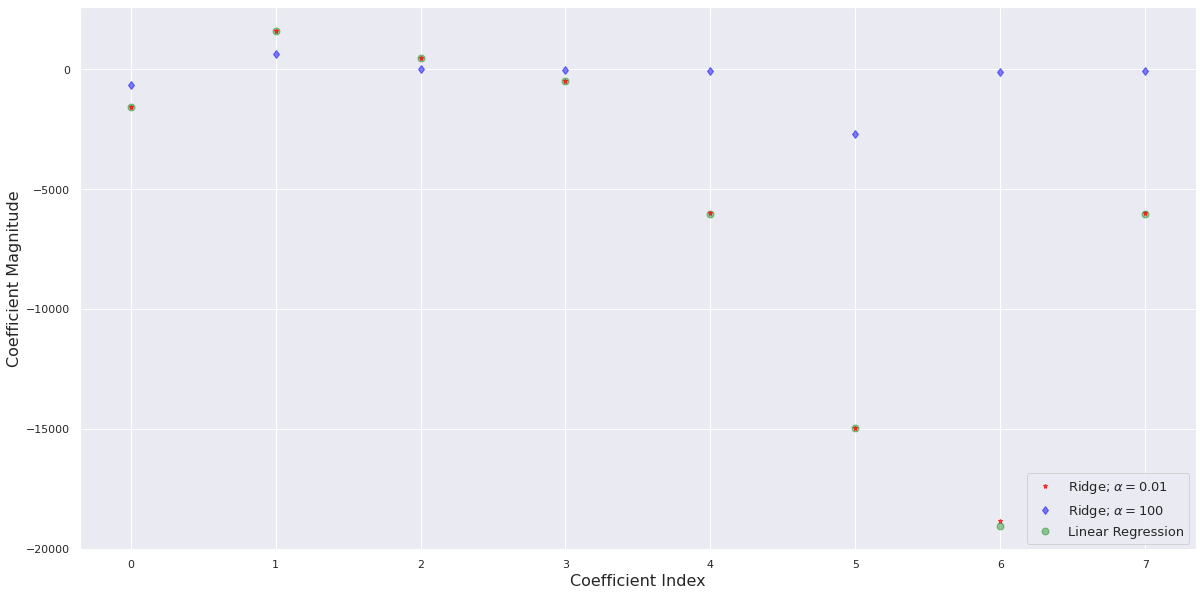

In [ ]:

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [ ]:
# Lasso :

X_train,X_test,y_train,y_test=train_test_split(newX,Y,test_size=0.2,random_state=3)

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print('Alpha(default) : ', 1.0)
print("Lasso training score:", train_score) 
print("test score: ", test_score)
print("Lasso number of features used: ", coeff_used)
print("*"*20)

lasso05 = Lasso(alpha=10, max_iter=10e5)
lasso05.fit(X_train,y_train)
train_score05=lasso05.score(X_train,y_train)
test_score05=lasso05.score(X_test,y_test)
coeff_used05 = np.sum(lasso05.coef_!=0)
print( "Lasso training score for alpha=0.5:", train_score05 )
print( "Lasso test score for alpha =0.5: ", test_score05)
print( "Lasso number of features used: for alpha =0.5:", coeff_used05)
print("*"*20)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print( "Lasso training score for alpha=0.01:", train_score001 )
print( "Lasso test score for alpha =0.01: ", test_score001)
print( "Lasso number of features used: for alpha =0.01:", coeff_used001)
print("*"*20)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print( "Lasso training score for alpha=0.0001:", train_score00001 )
print( "Lasso test score for alpha =0.0001: ", test_score00001)
print( "Lasso number of features used: for alpha =0.0001:", coeff_used00001)
print("*"*20)


Alpha(default) :  1.0
Lasso training score: 0.5771903746029781
test score:  0.5886101709865043
Lasso number of features used:  7
********************
Lasso training score for alpha=0.5: 0.5767257913433554
Lasso test score for alpha =0.5:  0.590374740974865
Lasso number of features used: for alpha =0.5: 7
********************
Lasso training score for alpha=0.01: 0.5771950584248718
Lasso test score for alpha =0.01:  0.5883969558475441
Lasso number of features used: for alpha =0.01: 7
********************
Lasso training score for alpha=0.0001: 0.5771950588140238
Lasso test score for alpha =0.0001:  0.5883954066760106
Lasso number of features used: for alpha =0.0001: 7
********************


## SUMMARY

### Highest Test Score is 0.590374740974865 from  Lasso with alpha = 0.5: so that shows that that is the best model with 8 selected features

Flow Summary:
1) dropped "car_ID" as it is a null column


2) No transformation or standardization on ‘Price’ because that’s target/dependent variable.

3) Log transform on few columns

4) standardization on ALL numerical columns ( except price )

5) One-hot encoding on categorical columns ( text/string value columns)

6) “data_standard” dataframe has all numerical columns standardized.

7) “data_onehot” has all the categorical columns encoded.

8) The X would both the variables in one place :
X = pd.concat([data_onehot, data_standard], axis=1)

9) Y is “price”
Y = data[‘price’]

10) Then run the RFE for feature selection. Total 8 out of 199 features are chosen for regression.
